#Insurance Claims Charges Prediction

Download dataset

In [4]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-04-20 04:58:50--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.007s  

2024-04-20 04:58:50 (7.20 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [1]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns


In [5]:
#Read the Data
data = pd.read_csv("insurance.csv")
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [8]:
# Descriptive stats
#Shape
print(data.shape)

(1338, 7)


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
#Mean charges for female
female=np.mean(data[data['sex']=='female']['charges'])
female

12569.578843835347

In [14]:
#Mean charges for male
male=np.mean(data[data['sex']=='male']['charges'])
male

13956.751177721893

In [15]:
# Null check
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Visulizations

<Figure size 1400x800 with 0 Axes>

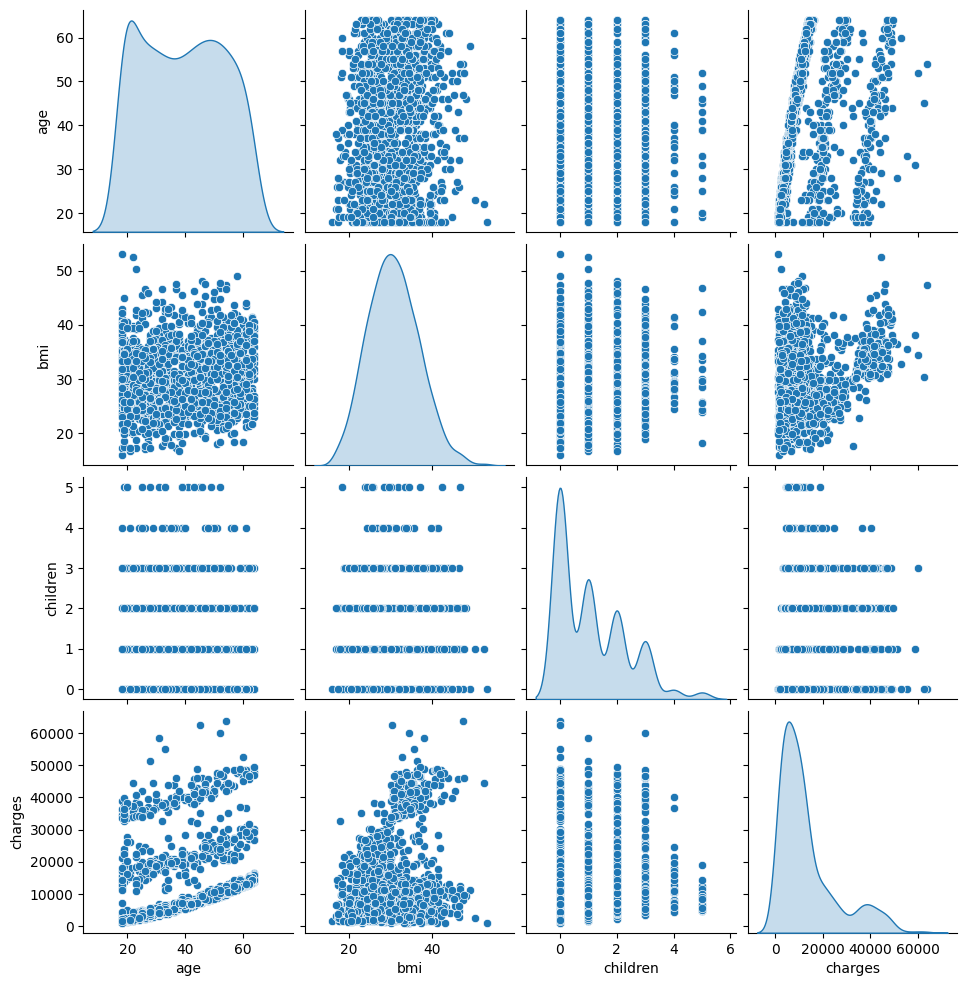

In [17]:
plt.figure(figsize = (14, 8))
sns.pairplot(data=data, diag_kind = 'kde')

<Axes: xlabel='age', ylabel='charges'>

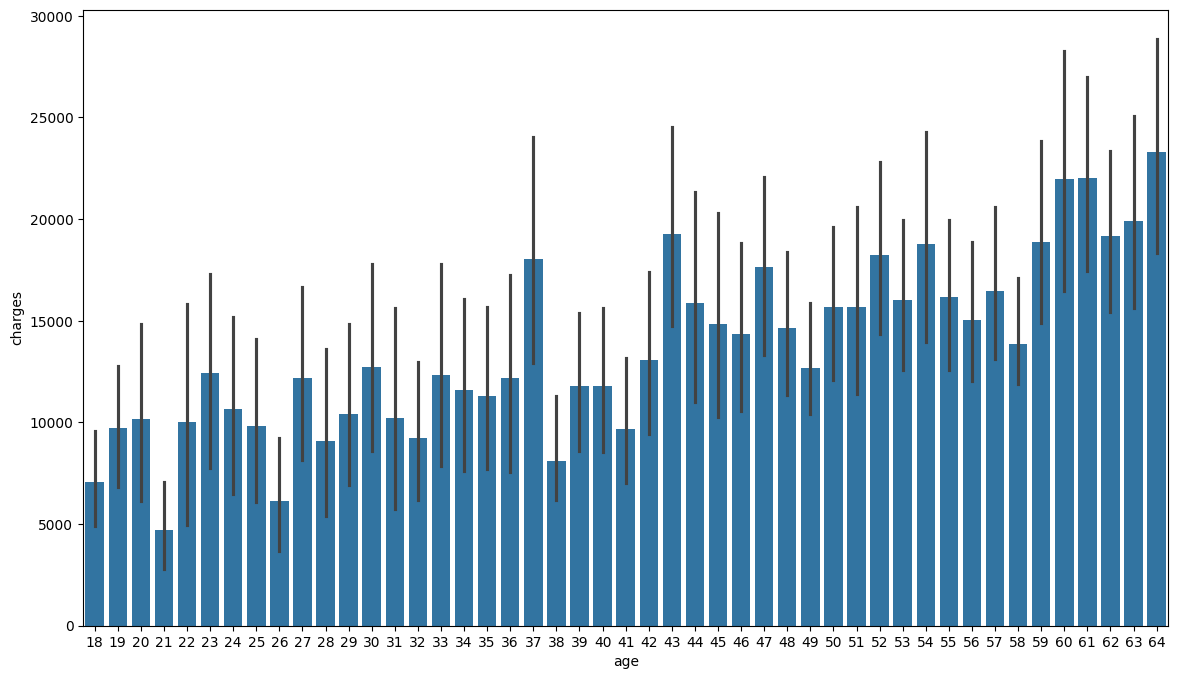

In [16]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.figure(figsize=(14,8))
sns.barplot(x='age',y='charges',data=data)

<Axes: xlabel='sex', ylabel='charges'>

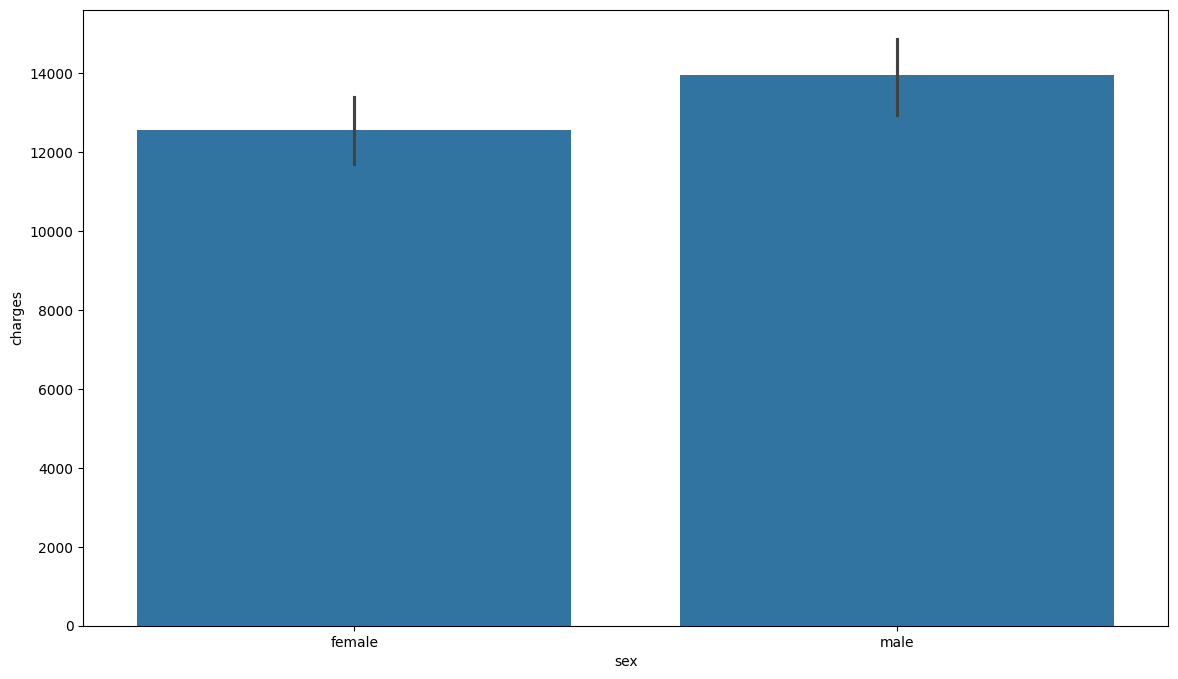

In [19]:
# sex vs charges
# males insurance charges more than females.
plt.figure(figsize=(14,8))
sns.barplot(x='sex',y='charges',data=data)

<Axes: xlabel='smoker', ylabel='charges'>

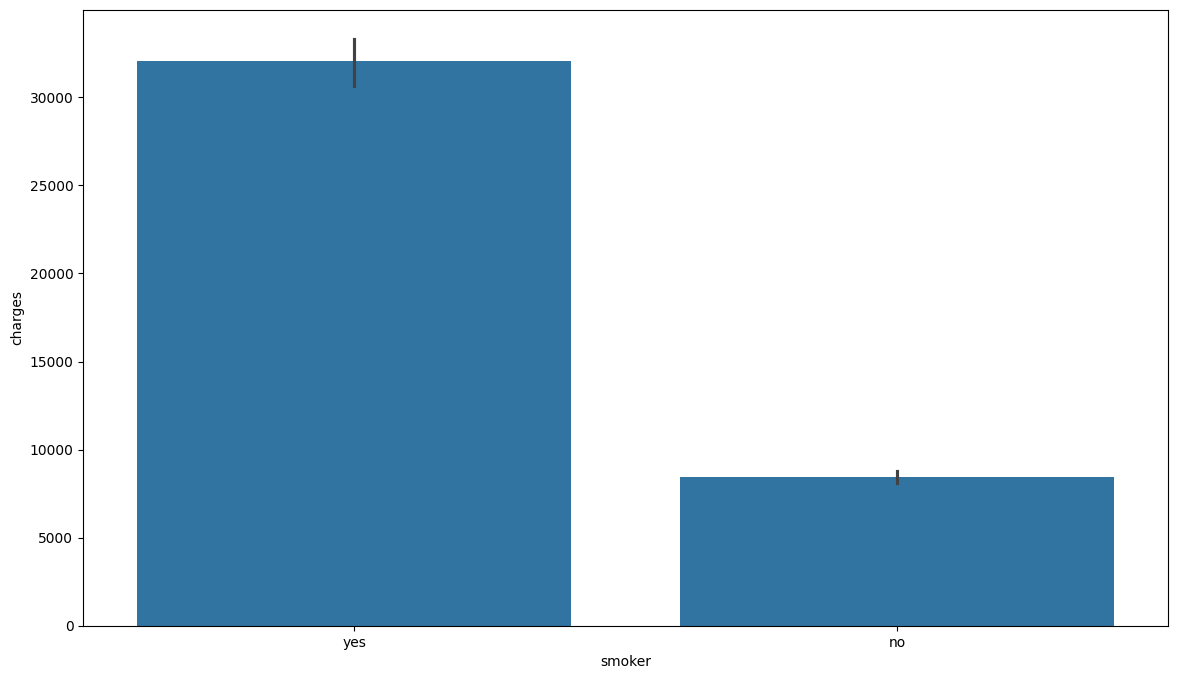

In [21]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.figure(figsize=(14,8))
sns.barplot(x='smoker',y='charges',data=data)

<Axes: xlabel='region', ylabel='charges'>

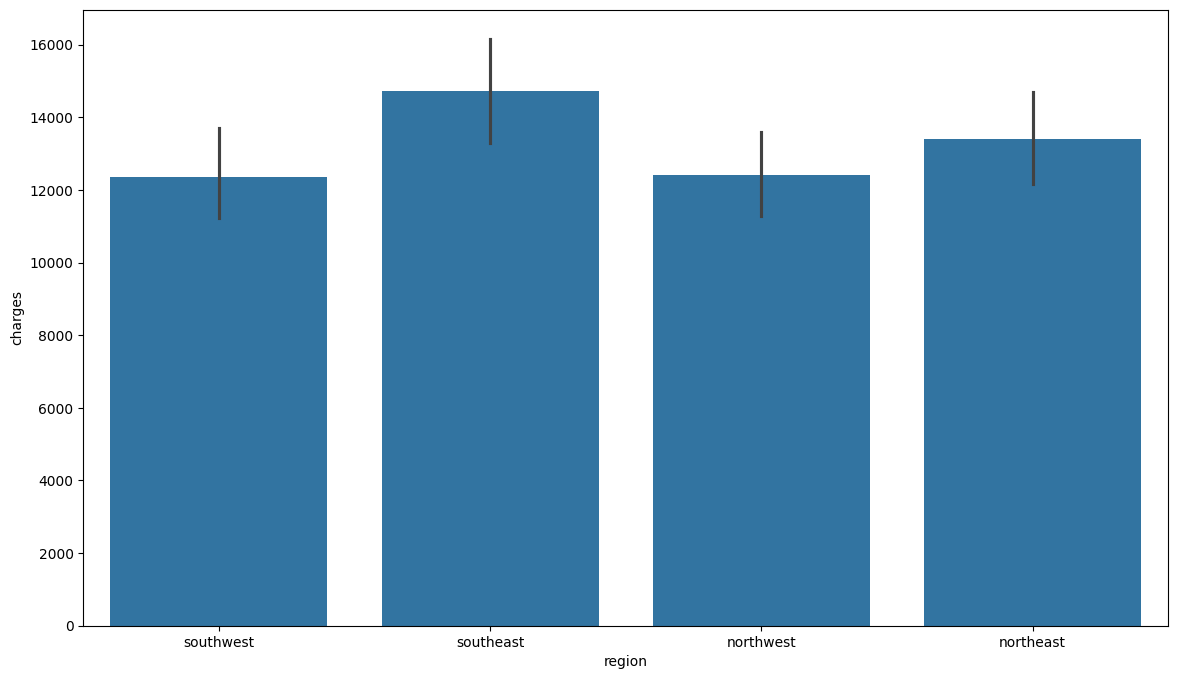

In [22]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.figure(figsize=(14,8))
sns.barplot(x='region',y='charges',data=data)

In [23]:
# plotting the correlation plot for the dataset

data2=data.copy()
data2['male'] = data2['sex'].replace('female', 0)
data2['male'] = data2['male'].replace('male', 1)
data2['smoker'].replace('no', 0, inplace=True)
data2['smoker'].replace('yes', 1, inplace=True)
data2.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'male'], dtype='object')

In [24]:
data2

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,1,southwest,16884.92400,0
1,18,male,33.770,1,0,southeast,1725.55230,1
2,28,male,33.000,3,0,southeast,4449.46200,1
3,33,male,22.705,0,0,northwest,21984.47061,1
4,32,male,28.880,0,0,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1
1334,18,female,31.920,0,0,northeast,2205.98080,0
1335,18,female,36.850,0,0,southeast,1629.83350,0
1336,21,female,25.800,0,0,southwest,2007.94500,0


In [26]:
data2.drop(['region'],axis=1,inplace=True)
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'charges', 'male'], dtype='object')

<Axes: >

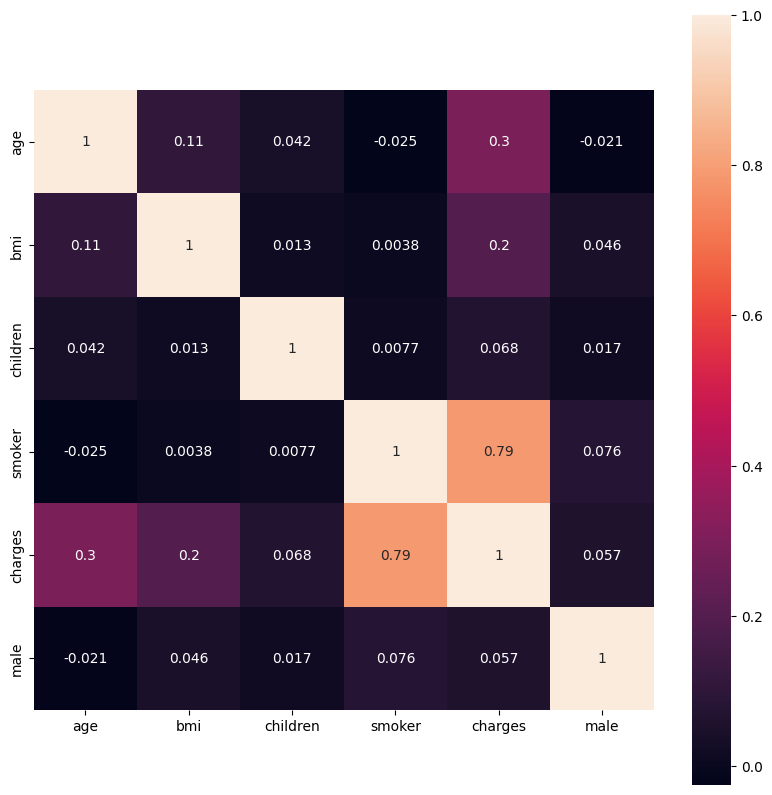

In [27]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data2.corr()
sns.heatmap(corr,annot=True,square = True, ax = ax)

##STEP-3:Data Preprocessing / Clean the Data


In [28]:
# removing unnecassary columns from the dataset
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])


In [30]:
data['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [31]:
data['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [49]:
#Selecting Independent (Features) & Dependent(Target) variables
y=data[['charges']]
X=data.drop(['charges'],axis=1)



In [64]:
X=X.drop(['region'],axis=1)

In [65]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [62]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [51]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

Splitting the dataset into the Training set and Test set

In [ ]:
data

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
X_train

,age,sex,bmi,children,smoker
560,46,0,19.950,2,0
1285,47,0,24.320,0,0
1142,52,0,24.860,0,0
969,39,0,34.320,5,0
486,54,0,21.470,3,0
...,...,...,...,...,...
1095,18,0,31.350,4,0
1130,39,0,23.870,5,0
1294,58,1,25.175,0,0
860,37,0,47.600,2,1


In [68]:
X_test

,age,sex,bmi,children,smoker
764,45,0,25.175,2,0
887,36,0,30.020,0,0
890,64,0,26.885,0,1
1293,46,1,25.745,3,0
259,19,1,31.920,0,1
...,...,...,...,...,...
109,63,1,35.090,0,1
575,58,0,27.170,0,0
535,38,1,28.025,1,0
543,54,0,47.410,0,1


In [40]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [41]:
y_test

,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [69]:
# creating the model
# feeding the training data to the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [71]:
# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [72]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

33979257.05080821

In [73]:
# Calculating the root mean squared error
rsme = np.sqrt(mse)
rsme

5829.17293025419

In [74]:
# Calculating the r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2


0.7811302113434095

##Support Vector Machine

In [75]:
# creating the model
# feeding the training data to the model
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)



In [76]:
# predicting the test set results
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
# calculating the mean squared error
mse = mean_squared_error(y_test,y_pred)
mse

165637998.98220563

In [78]:
# Calculating the root mean squared error
rmse = np.sqrt(mse)
rmse

12870.042695430564

In [79]:
# Calculating the r2 score
r2 = r2_score(y_test,y_pred)
r2

-0.066920144149343

##Decision Tree

In [80]:
# creating the model
# feeding the training data to the model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)



In [81]:
# predicting the test set results
y_pred = model.predict(X_test)

In [82]:
# calculating the mean squared error
mse = mean_squared_error(y_test,y_pred)
mse

35939832.41892658

In [83]:
# Calculating the root mean squared error
rmse = np.sqrt(mse)
rmse

5994.983938170859

In [84]:
# Calculating the r2 score
r2 = r2_score(y_test,y_pred)
r2

0.7685016033716772

##Random Forest

In [85]:
# creating the model
# feeding the training data to the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=40,max_depth=4,n_jobs=-1)
model.fit(X_train,y_train)


<ipython-input-85-73cbcf75d29d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor(max_depth=4, n_estimators=40, n_jobs=-1)

In [86]:
# predicting the test set results
y_pred = model.predict(X_test)

In [87]:
# calculating the mean squared error
mse = mean_squared_error(y_test,y_pred)
mse

18964666.708280675

In [88]:
# Calculating the root mean squared error
rmse = np.sqrt(mse)
rmse

4354.844050971364

In [89]:
# Calculating the r2 score
r2 = r2_score(y_test,y_pred)
r2

0.877843338711688

Compare and evaluate the Model results and find the best model

From the above, Random forest is having highest accuracy